In [ ]:
###################################################

In [ ]:
!source venv2/bin/activate


In [5]:
import sys
print(sys.executable)


/bin/python3


In [10]:
!pip install spacy==3.2.0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!python3 -m spacy download it_core_news_sm

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.2.0/it_core_news_sm-3.2.0-py3-none-any.whl#egg=it_core_news_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 112.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [7]:
!pip show spacy
!pip show torch


Name: spacy
Version: 3.2.0
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /home/v.acampora/venv2/lib/python3.8/site-packages
Requires: blis, catalogue, cymem, jinja2, langcodes, murmurhash, numpy, packaging, pathy, preshed, pydantic, requests, setuptools, spacy-legacy, spacy-loggers, srsly, thinc, tqdm, typer, wasabi
Required-by: it-core-news-sm
Name: torch
Version: 1.11.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/v.acampora/venv2/lib/python3.8/site-packages
Requires: typing-extensions
Required-by: 


In [20]:
!pip install thinc==8.0.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
!pip install pydantic==1.7.4


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip check


No broken requirements found.


In [ ]:
######################################################################

In [1]:
import spacy
nlp = spacy.load("it_core_news_sm")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


/home/v.acampora/venv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
###################### carica dataset LDO 20-21 ############################ 

dataLDO2020 = pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20200101_20210101 pulito.ods', engine='odf')
dataLDO2021=pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20210101_20220101 pulito.ods', engine='odf')


In [4]:
# Filtra le righe che non contengono numeri (escludendo anche i NaN)
dataLDO2021 = dataLDO2021[dataLDO2021['nosologico'].astype(str).str.contains(r'\d')]
#rimosse 212 righe

In [ ]:
print("\nColumns LDO 20-21:", dataLDO2020.columns)
print("\nColumns LDO 21-22:", dataLDO2021.columns)
print("\nShape LDO 20-21:", dataLDO2020.shape)
print("\nShape LDO 21-22:", dataLDO2021.shape)



Columns LDO 20-21: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Columns LDO 21-22: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Shape LDO 20-21: (24123, 17)

Shape LDO 21-22: (39274, 17)


In [5]:
######################## carica database filtrato ###############################

databaseFiltrato=pd.read_csv('/home/a.renda/to_move/LDO/labeled/20-21_341/DatabaseFiltrato.csv', sep=';')
print(databaseFiltrato.shape)
print(databaseFiltrato.columns) # la prima colonna è solo un contatore

(26237, 3)
Index(['Unnamed: 0', 'nosologico', 'label'], dtype='object')


In [6]:
# Filtra le righe che non contengono numeri (escludendo anche i NaN)
databaseFiltrato = databaseFiltrato[databaseFiltrato['nosologico'].astype(str).str.contains(r'\d')]

#tolte 5 righe

In [7]:
#################### filtra ldo 2020 ##########################

# Converti la colonna 'nosologico' del secondo dataset in int
databaseFiltrato['nosologico'] = pd.to_numeric(databaseFiltrato['nosologico'], errors='coerce')


# Trova i nosologici comuni
comuni2020 = dataLDO2020['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2020 = dataLDO2020[comuni2020]
print(dataset_filtrato2020.columns)
print(dataset_filtrato2020.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(8974, 17)


In [8]:
####################### filtra ldo 2021 ###########################

# Trova i nosologici comuni
comuni2021 = dataLDO2021['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2021 = dataLDO2021[comuni2021]
print(dataset_filtrato2021.columns)
print(dataset_filtrato2021.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(17218, 17)


In [9]:
######################## merge ldo2020 e ldo 2021 filtrati ###################################

merged_dataset = pd.concat([dataset_filtrato2020, dataset_filtrato2021], ignore_index=True) # non ci sono duplicati tra i due dataset 

# Risultato finale
print("\nColumns merged dataset:",merged_dataset.columns)
print("\nShape merged dataset:",merged_dataset.shape)
print(merged_dataset['testo'][0])



Columns merged dataset: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Shape merged dataset: (26192, 17)
ObesitÃ  di classe III complicata da ipertensione arteriosa, insulino-resistenza con ridotta tolleranza glucidica, epatomegalia steatosica, insufficienza venosa arti inferiori, ipovitaminosi D e ernia iatale,colelitiasi trattata con colecistectomia,regredita a obesitÃ  di classe I dopo intervento chirurgico di bypass gastrico (2011) al peso di 142 Kg con persistenza di ipovitaminosi D, remissione delle comorbiditÃ  e comparsa di ipoglicemia reattiva sintomatica. Micronodulia tiroidea. Anemia microcitica ipocrocromica, sideropenica. Emorroidi congeste del canale anale.Terapia consigliata alla dimissione:Pr: Bariatrifast cpS: 1 cp ore 8.00Pr: Gl

In [10]:
######################## carica dataset con nosologici positivi #####################

Positivi= pd.read_excel('/home/a.renda/to_move/LDO/labeled/20-21_341/NosologiciPositivi_341.xlsx')

In [11]:
################################### aggiungere la colonna positivi #########################################

# Convertire la colonna 'Nosologico' in numerico nel dataset NosologiciPositivi
nosologici_positivi = pd.to_numeric(Positivi['NosologiciPositivi'], errors='coerce').dropna()

# Creare la colonna 'positivi' nel DataFrame merged_dataset
merged_dataset['positivi'] = merged_dataset['nosologico'].isin(nosologici_positivi).astype(int)


# Contare quanti 1 e quanti 0 ci sono nella colonna 'positivi'
count_positivi = merged_dataset['positivi'].value_counts()

# Stampa i risultati
print("\nConteggio dei valori nella colonna 'positivi':")
print(f"Numero di 1 (positivi): {count_positivi.get(1, 0)}")
print(f"Numero di 0 (non positivi): {count_positivi.get(0, 0)}")


Conteggio dei valori nella colonna 'positivi':
Numero di 1 (positivi): 341
Numero di 0 (non positivi): 25851


In [12]:
# Unire parole e numeri in 'reparto' rimuovendo lo spazio e sostituendo con un trattino
merged_dataset['reparto'] = merged_dataset['reparto'].str.replace(r'(\w) (\d)', r'\1-\2', regex=True)

# Visualizza i risultati
print(merged_dataset['reparto'].head())

0    UO Endocrinologia-1
1    UO Endocrinologia-1
2    UO Endocrinologia-1
3    UO Endocrinologia-1
4    UO Endocrinologia-1
Name: reparto, dtype: object


In [13]:
###################### pulisci il testo: risoluzione di errori di codifica, sostituzione caratteri speciali #######################
import ftfy

# Applica ftfy.fix_text() a tutte le colonne di testo nel dataset, gestendo i valori non testuali
for col in merged_dataset.select_dtypes(include='object').columns:
    merged_dataset[col] = merged_dataset[col].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)


In [ ]:
########################## PRE-PROCESSING vecchio ##########################

import spacy
import pandas as pd
import re

# Carica il modello SpaCy per l'italiano
nlp = spacy.load("it_core_news_sm", disable=["parser", "ner"])

# Lista delle colonne su cui applicare il preprocessing
colonne_da_preprocessare = ['testo', 'motivo_ricovero', 'anamnesi', 
                             'esameobiettivo', 'terapiafarmaingresso', 
                             'decorso', 'laboratorio', 'interventi', 
                             'followup', 'terapie2', 'terapie3', 
                             'esami', 'reparto']  # Sostituisci con i nomi reali delle colonne

# Funzione per pulire i token
def clean_token(token):

    # Rimuovi numeri con virgola
    if re.match(r'^\d{1,3}(?:,\d{1,3})$', token):
        return ''  # Scarta il token

    # Mantieni numeri, lettere, rimuovendo altri caratteri speciali
    cleaned_token = re.sub(r'[^a-zA-Z0-9]', '', token) 

    # Scarta il token se è composto solo da un carattere o solo da un numero
    if re.match(r'^\d+$', cleaned_token):  # Se è solo un numero, scartalo
        return ''
    return '' if len(cleaned_token) == 1 else cleaned_token


# Funzione per tokenizzare e preprocessare
def preprocess_text(row):
    if not isinstance(row, str):  # Verifica che row sia una stringa
        return ""  # Restituisce una stringa vuota se non è valida (ovvero quando vede un nan restiruisce una stringa vuota)
    
    # Rimuove date nel formato 'dd/mm/yyyy' e 'dd/mm/yy'
    row = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '', row)
    row = re.sub(r'\d{1,2}/\d{1,2}', '', row)  # Rimuove numeri separati da /

    # Gestisci i punti tra le parole (ad esempio "v.analisi" diventa "v analisi")
    row = re.sub(r'(\w)\.(\w)', r'\1 \2', row)  # Aggiunge uno spazio tra parole separate da punto

        
    # Tokenizza il testo con SpaCy
    doc = nlp(row)
    
    # Filtra stopwords e punteggiatura
    tokens_puliti = [
        clean_token(token.lemma_.lower())  # Lemmatizza, porta a minuscolo e pulisce il token
        for token in doc
        if not token.is_punct and not token.is_stop 
    ]
    
    # Ricombina i token in una stringa
    return " ".join(tokens_puliti)

# Applica il preprocessing per ciascuna colonna specificata
for colonna in colonne_da_preprocessare:
    nuova_colonna = f"{colonna}_preprocessed"  # Nome della nuova colonna
    merged_dataset[nuova_colonna] = merged_dataset[colonna].apply(preprocess_text)

# Visualizza i risultati per le nuove colonne preprocessate
print(merged_dataset[[colonna for colonna in colonne_da_preprocessare] + 
                     [f"{col}_preprocessed" for col in colonne_da_preprocessare]])


                                                   testo  \
0      Obesità di classe III complicata da ipertensio...   
1      Carcinoma della tiroide a cellule ossifile (4 ...   
2      Carcinoma papillare differenziato della tiroid...   
3      gozzo multinodulare con quattro focolai di car...   
4      Carcinoma papillare (1,5 cm) variante classica...   
...                                                  ...   
26187  Cistopessi fasciale in paziente con cistocele ...   
26188  Polipectomia resettoscopica, miomectomia reset...   
26189  Laparoscopia, isterectomia sovracervicale, ann...   
26190  Polipectomia resettoscopica in paziente con po...   
26191                                  Mioma sottomucoso   

                                         motivo_ricovero  \
0      Accertamenti in paziente con sangue occulto po...   
1      trattamento radiometabolico con 131-I a dose alta   
2      Terapia radiometabolica con 131-I a scopo adiu...   
3      terapia radiometabolica con 131-

In [ ]:
########################## PRE-PROCESSING nuovo ##########################
import spacy
import pandas as pd
import re

# Carica il modello SpaCy per l'italiano
nlp = spacy.load("it_core_news_lg", disable=["parser", "ner"])

# Lista delle colonne su cui applicare il preprocessing
colonne_da_preprocessare = ['testo', 'motivo_ricovero', 'anamnesi', 
                             'esameobiettivo', 'terapiafarmaingresso', 
                             'decorso', 'laboratorio', 'interventi', 
                             'followup', 'terapie2', 'terapie3', 
                             'esami', 'reparto']  # Sostituisci con i nomi reali delle colonne

def clean_token(token):

    # Rimuovi caratteri non alfanumerici (inclusi simboli, punteggiatura, numeri, ecc.) e sostituiscili con uno spazio
    cleaned_token = re.sub(r'[^a-zA-ZàèéìòùÀÈÉÌÒÙ]', ' ', token)
    cleaned_token = re.sub(r'\s+', ' ', cleaned_token).strip()  # Normalizza gli spazi multipli

    return cleaned_token

    
# Funzione per tokenizzare e preprocessare il testo
def preprocess_text(row):
    if not isinstance(row, str):  # Verifica che il dato sia una stringa valida
        return ""  # Restituisce una stringa vuota se non valido
    
    # Rimuove date nel formato 'dd/mm/yyyy' e 'dd/mm/yy'
    row = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '', row)
    row = re.sub(r'\d{1,2}/\d{1,2}', '', row)  # Rimuove numeri separati da /
      
    # Aggiunge spazi tra numeri e lettere (es. "800duloxetina" -> "800 duloxetina")
    row = re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', row)
    row = re.sub(r'([a-zA-Z]+)(\d+)', r'\1 \2', row)

    # Aggiunge spazi tra parole composte tipo "vediAllegato" -> "vedi Allegato"
    row = re.sub(r'([a-zàèéìòù])([A-ZÀÈÉÌÒÙ])', r'\1 \2', row)

    # normalizza  spazi (se ci sono più spazi consecutivi, vengono ridotti a uno solo) e rimuove  spazi all'inizio e alla fine della stringa
    row = re.sub(r'[^\w\s]', ' ', row)  # Rimuove caratteri non alfanumerici e parentesi

    doc = nlp(row)
   
    # Filtra e normalizza i token
    tokens_puliti = [
        clean_token(token.lemma_.lower())
        for token in doc
        if not token.is_punct and not token.is_stop and len(token.text) > 1 #and token.text.isalpha() 
    ]

    
    # Applica un filtro finale per rimuovere manualmente le lettere singole
    tokens_puliti = [token for token in tokens_puliti if len(token) > 1]  # Assicura che tutte le parole siano > 1 carattere
    

    # Ricombina i token in una stringa
    return " ".join(tokens_puliti)

# Applica il preprocessing per ciascuna colonna specificata
for colonna in colonne_da_preprocessare:
    nuova_colonna = f"{colonna}_preprocessed"  # Nome della nuova colonna
    merged_dataset[nuova_colonna] = merged_dataset[colonna].apply(preprocess_text)

# Visualizza i risultati per le nuove colonne preprocessate
print(merged_dataset[[colonna for colonna in colonne_da_preprocessare] + 
                     [f"{col}_preprocessed" for col in colonne_da_preprocessare]])

/home/v.acampora/venv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-10 15:59:08.270822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 15:59:08.864450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
############################ DIMENSIONE VOCABOLARIO ############################
# Calcola il vocabolario
vocab_set = set()
# Itera sulle prime 100 righe delle colonne preprocessate
for colonna in colonne_da_preprocessare:
    for testo in merged_dataset[f"{colonna}_preprocessed"]:  # Limita a 100 righe
        if isinstance(testo, str):  # Assicurati che il testo non sia NaN
            vocab_set.update(testo.split())

# Calcola la dimensione del vocabolario
vocabolario_dimensione = len(vocab_set)
print("Dimensione del vocabolario:", vocabolario_dimensione)

Dimensione del vocabolario: 129725


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combina tutte le colonne di testo in un'unica colonna
# Filtra solo le colonne di testo preprocessato che desideri analizzare
columns_of_interest = ['testo_preprocessed', 'motivo_ricovero_preprocessed', 'anamnesi_preprocessed', 
                             'esameobiettivo_preprocessed', 'terapiafarmaingresso_preprocessed', 
                             'decorso_preprocessed', 'laboratorio_preprocessed', 'interventi_preprocessed', 
                             'followup_preprocessed', 'terapie2_preprocessed', 'terapie3_preprocessed', 
                             'esami_preprocessed', 'reparto_preprocessed']  # Sostituisci con i nomi delle colonne
merged_dataset['combined_text'] = merged_dataset[columns_of_interest].fillna('').agg(' '.join, axis=1)

# Calcola il vocabolario dalla colonna 'combined_text'
vocab_set = set()
for testo in merged_dataset['combined_text']:
    if isinstance(testo, str):  # Assicurati che il testo non sia NaN
        vocab_set.update(testo.split())

# Calcola la dimensione del vocabolario
vocabolario_dimensione = len(vocab_set)

# Vettorizzazione usando TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Filtra i NaN e vettorizza la colonna 'combined_text'
valid_texts = merged_dataset['combined_text'].dropna()  # Rimuove i NaN
tfidf_matrix = tfidf_vectorizer.fit_transform(valid_texts)

# Numero di features (parole) nella matrice TF-IDF
num_features = tfidf_matrix.shape[1]

# Confronto tra dimensione del vocabolario e numero di features
print("Dimensione del vocabolario:", vocabolario_dimensione)
print("Numero di features nella matrice TF-IDF:", num_features)

# Verifica dell'uguaglianza
if vocabolario_dimensione == num_features:
    print("La dimensione del vocabolario coincide con il numero di features nella matrice TF-IDF.")
else:
    print("La dimensione del vocabolario NON coincide con il numero di features nella matrice TF-IDF.")
    # Trova le discrepanze
    tfidf_features = set(tfidf_vectorizer.get_feature_names_out())
    vocab_not_in_tfidf = vocab_set - tfidf_features
    tfidf_not_in_vocab = tfidf_features - vocab_set

    print("\nParole presenti nel vocabolario manuale ma non nel TF-IDF:")
    print(vocab_not_in_tfidf)

    print("\nParole presenti nel TF-IDF ma non nel vocabolario manuale:")
    print(tfidf_not_in_vocab)


Dimensione del vocabolario: 129725
Numero di features nella matrice TF-IDF: 129715
La dimensione del vocabolario NON coincide con il numero di features nella matrice TF-IDF.

Parole presenti nel vocabolario manuale ma non nel TF-IDF:
{'t', 'g', 's', 'f', 'l', 'i', 'v', 'd', 'p', 'a'}

Parole presenti nel TF-IDF ma non nel vocabolario manuale:
set()


In [16]:
########################### MEDIA NUMERO PAROLE COLONNE PRE-PROCESSATE #######################

# Funzione per calcolare il numero di parole
def count_words(text):
    if isinstance(text, str):  # Verifica se il testo è una stringa
        return len(text.split())  # Conta le parole
    elif isinstance(text, (int, float)):  # Se è un numero
        return 1  # Considera il numero come una parola
    return 0  # Restituisce 0 se non è una stringa o un numero

for colonna in colonne_da_preprocessare:
    nuova_colonna = f"{colonna}_preprocessed"
    word_counts = merged_dataset[nuova_colonna].apply(count_words)  # Conta le parole in ogni stringa
    average_word_count = word_counts.mean()  # Calcola la lunghezza media
    print(f"Lunghezza media della colonna '{nuova_colonna}' in parole: {average_word_count:.2f}")


Lunghezza media della colonna 'testo_preprocessed' in parole: 19.96
Lunghezza media della colonna 'motivo_ricovero_preprocessed' in parole: 8.87
Lunghezza media della colonna 'anamnesi_preprocessed' in parole: 177.85
Lunghezza media della colonna 'esameobiettivo_preprocessed' in parole: 35.06
Lunghezza media della colonna 'terapiafarmaingresso_preprocessed' in parole: 10.23
Lunghezza media della colonna 'decorso_preprocessed' in parole: 139.84
Lunghezza media della colonna 'laboratorio_preprocessed' in parole: 123.56
Lunghezza media della colonna 'interventi_preprocessed' in parole: 42.61
Lunghezza media della colonna 'followup_preprocessed' in parole: 71.41
Lunghezza media della colonna 'terapie2_preprocessed' in parole: 2.22
Lunghezza media della colonna 'terapie3_preprocessed' in parole: 34.50
Lunghezza media della colonna 'esami_preprocessed' in parole: 14.21
Lunghezza media della colonna 'reparto_preprocessed' in parole: 2.99


In [17]:
print(merged_dataset['testo'][2])
print(merged_dataset['testo_preprocessed'][2])

Carcinoma papillare differenziato della tiroide (>4cm, lobo sinistro), variante classica, multifocale, bilaterale, limitato alla ghiandola (T3amN1Mx) associato a tiroidite linfocitaria trattato con  tiroidectomia totale  ed asportazione parziale dei linfonodi del comparto centrale (Pisa, San Rossore. Prof Galleri) e terapia radiometabolica con 131-I a scopo adiuvante (Pisa)
carcinoma papillare differenziare tiroide cm lobo sinistro variante classico multifocale bilaterale limitare ghiandola am mx associare tiroidite linfocitaria trattare tiroidectomia totale asportazione parziale linfonodo comparto centrale pisa san rossore prof galleri terapia radiometabolica adiuvante pisa


In [15]:
########################## CLASSIFIERS #################

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Definisci una lista di classificatori che vuoi provare
classifiers = {
    #'RandomForest': RandomForestClassifier(n_jobs=-1, max_depth=10, max_features=0.1, random_state=42),
    #'LogisticRegression': LogisticRegression(random_state=42, max_iter=200),
    #'SVM': SVC(probability=True,random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(max_depth=10, random_state=42),
    #'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'extremeGradientBoosting': XGBClassifier( learning_rate=0.1, random_state=42, n_jobs=-1, max_depth=6),
}

In [16]:
########################### CROSS VALIDATION #########################

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import numpy as np

# Funzione modificata per includere la media delle features
def eval_cross_validation(pipeline, X, y, skf):
    list_reports = []
    list_f1 = []
    list_auc = []  # Lista per raccogliere i valori di AUC mediati
    list_num_features = []  # Lista per raccogliere il numero di features per ogni fold
    
    # Crea una lista per raccogliere precision, recall e f1-score mediati
    precision_sum = {}
    recall_sum = {}
    f1_sum = {}
    
    # Liste per la deviazione standard
    precision_values = {}
    recall_values = {}
    f1_values = {}

    # Inizializza il supporto per ogni classe
    unique_labels = y.unique()
    support_sum = {str(label): 0 for label in unique_labels}  # Assicurati che le etichette siano stringhe

    for train, val in skf.split(X, y):
        X_tr = X.iloc[train]  # differenza con 'baseline1'
        y_tr = y.iloc[train]
        X_val = X.iloc[val]
        y_val = y.iloc[val]

        # Addestra il pipeline sul training set
        pipeline.fit(X_tr, y_tr)

        # Previsioni sul validation set
        y_pred = pipeline.predict(X_val)
        y_pred_prob = pipeline.predict_proba(X_val)[:, 1]  # Probabilità della classe positiva

        # Crea il classification report come dizionario
        cr = classification_report(y_val, y_pred, output_dict=True)

        # Aggiungi il report alla lista
        list_reports.append(cr)

        # Estrai il F1-score
        list_f1.append(cr['weighted avg']['f1-score'])

        # Calcola l'AUC per questo fold
        auc_score = roc_auc_score(y_val, y_pred_prob)
        list_auc.append(auc_score)

        # Raccogli il numero di features per questo fold
        X_tfidf = pipeline.named_steps['tfidf'].transform(X_val)  # Modificato per estrarre la trasformazione
        list_num_features.append(X_tfidf.shape[1])  # Numero di features per questo fold

        # Somma le metriche per ogni classe
        for label, metrics in cr.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                precision_sum[label] = precision_sum.get(label, 0) + metrics['precision']
                recall_sum[label] = recall_sum.get(label, 0) + metrics['recall']
                f1_sum[label] = f1_sum.get(label, 0) + metrics['f1-score']

                # Aggiungi valori per la deviazione standard
                precision_values[label] = precision_values.get(label, []) + [metrics['precision']]
                recall_values[label] = recall_values.get(label, []) + [metrics['recall']]
                f1_values[label] = f1_values.get(label, []) + [metrics['f1-score']]

                # Somma il supporto per questa fold
                support_sum[str(label)] += metrics['support']  # Usa str(label) per garantire la corrispondenza

    # Calcola la media dell'AUC
    auc_avg = np.mean(list_auc)

    # Calcola la media del numero di features
    num_features_avg = np.mean(list_num_features)

    # Calcola la media delle metriche per ogni classe
    num_folds = skf.get_n_splits()
    precision_avg = {label: precision_sum[label] / num_folds for label in precision_sum}
    recall_avg = {label: recall_sum[label] / num_folds for label in recall_sum}
    f1_avg_per_class = {label: f1_sum[label] / num_folds for label in f1_sum}

    # Calcola la deviazione standard per ogni metrica
    precision_std = {label: np.std(precision_values[label]) for label in precision_values}
    recall_std = {label: np.std(recall_values[label]) for label in recall_values}
    f1_std = {label: np.std(f1_values[label]) for label in f1_values}

    # Calcola il supporto medio per ciascuna classe
    support_avg = {label: support_sum[label] / num_folds for label in support_sum}

    # Crea un DataFrame per visualizzare le metriche
    df_avg = pd.DataFrame({
        'Precision': precision_avg,
        'Recall': recall_avg,
        'F1-Score': f1_avg_per_class,
        'Precision Std': precision_std,
        'Recall Std': recall_std,
        'F1-Score Std': f1_std,
        'Support': support_avg,  # Supporto medio
        'Avg Features': num_features_avg,  # Media delle features
    })  # Trasponi per avere le classi come righe

    return df_avg, auc_avg, f1_avg_per_class, num_features_avg 
 

# Crea un oggetto StratifiedKFold per la cross-validation stratificata
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
###################### CUSTOM TRASFORMER SENZA MAX FEATURES ########################

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd

class CustomTfidfTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        CustomTfidfTransformer applica un TfidfVectorizer separatamente per ogni colonna.
        Non impone limiti sul numero di features, quindi utilizza tutte le parole per ogni colonna.
        """
        self.tfidf_column_vectorizers = {}
        self.column_feature_counts = {}  # Dictionario per accumulare le features di ogni colonna

    def fit(self, X, y=None):
        # Crea un TfidfVectorizer per ogni colonna e registra il numero di features
        for col in X.columns:
            col_data = X[col].fillna('').astype(str)
            vectorizer = TfidfVectorizer()
            self.tfidf_column_vectorizers[col] = vectorizer
            self.tfidf_column_vectorizers[col].fit(col_data)

            # Salva il numero di features per questa colonna
            num_features_col = len(vectorizer.get_feature_names_out())
            if col in self.column_feature_counts:
                self.column_feature_counts[col].append(num_features_col)
            else:
                self.column_feature_counts[col] = [num_features_col]

        return self

    def transform(self, X):
        transformed_columns = []
        for col in X.columns:
            col_data = X[col].fillna('').astype(str)
            transformed_columns.append(self.tfidf_column_vectorizers[col].transform(col_data))
        X_combined = hstack(transformed_columns)
        return X_combined

    def mean_features_per_column(self):
        """
        Calcola e restituisce il numero medio di features per colonna.
        """
        mean_features = {col: sum(counts) / len(counts) for col, counts in self.column_feature_counts.items()}
        return mean_features



### Modello: extremeGradientBoosting ###
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.988479  0.998956  0.993689       0.000782    0.000491       0.00041   
1   0.584470  0.117395  0.191288       0.129659    0.058954       0.08719   

   Support  Avg Features  
0   2585.1      262472.7  
1     34.1      262472.7  
AUC medio: 0.9410
Numero medio di features: 262472.70

Numero medio di features per ciascuna colonna:
Colonna 'testo_preprocessed': 15880.00 features
Colonna 'motivo_ricovero_preprocessed': 11677.73 features
Colonna 'anamnesi_preprocessed': 60018.73 features
Colonna 'esameobiettivo_preprocessed': 13422.00 features
Colonna 'terapiafarmaingresso_preprocessed': 8990.91 features
Colonna 'decorso_preprocessed': 44767.00 features
Colonna 'laboratorio_preprocessed': 50291.09 features
Colonna 'interventi_preprocessed': 28997.27 features
Colonna 'followup_preprocessed': 17152.27 features
Colonna 'terapie2_preprocess

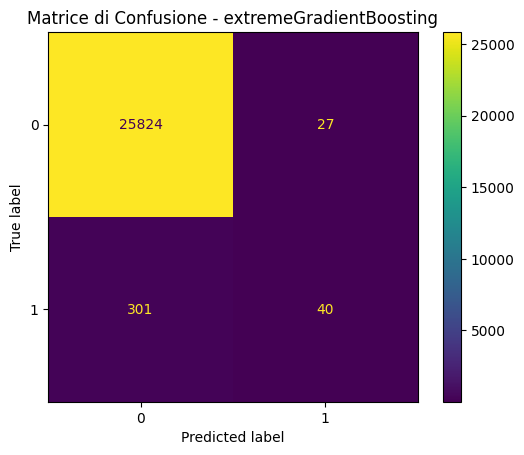

In [18]:
####################### CLASSIFICATION SENZA MAX FEATURES E SENZA SMOTE ###########################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Lista delle colonne preprocessate
colonne_preprocessate = [f"{colonna}_preprocessed" for colonna in colonne_da_preprocessare]

# Esegui la cross-validation per ogni classificatore
X = merged_dataset[colonne_preprocessate]
y = merged_dataset['positivi']

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
        ('tfidf', CustomTfidfTransformer() ),  # Usa il CustomTfidfTransformer
        ('classificazione', clf)
    ])

    # Trasforma i dati e ottieni la matrice TF-IDF combinata
    X_tfidf = pipeline.named_steps['tfidf'].fit_transform(X)
    
    #num_samples, num_features = X_tfidf.shape
    #print(f"Dimensione della matrice TF-IDF combinata: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Stampa il numero medio di features per colonna
    mean_features = pipeline.named_steps['tfidf'].mean_features_per_column()
    print("\nNumero medio di features per ciascuna colonna:")
    for col, mean_count in mean_features.items():
        print(f"Colonna '{col}': {mean_count:.2f} features")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()



### Modello: extremeGradientBoosting ###
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.990807  0.996248  0.993519       0.000854    0.001272      0.000536   
1   0.523133  0.298908  0.374190       0.078468    0.068121      0.058236   

   Support  Avg Features  
0   2585.1      262472.7  
1     34.1      262472.7  
AUC medio: 0.9373
Numero medio di features: 262472.70

Numero medio di features per ciascuna colonna:
Colonna 'testo_preprocessed': 15880.00 features
Colonna 'motivo_ricovero_preprocessed': 11677.73 features
Colonna 'anamnesi_preprocessed': 60018.73 features
Colonna 'esameobiettivo_preprocessed': 13422.00 features
Colonna 'terapiafarmaingresso_preprocessed': 8990.91 features
Colonna 'decorso_preprocessed': 44767.00 features
Colonna 'laboratorio_preprocessed': 50291.09 features
Colonna 'interventi_preprocessed': 28997.27 features
Colonna 'followup_preprocessed': 17152.27 features
Colonna 'terapie2_preprocess

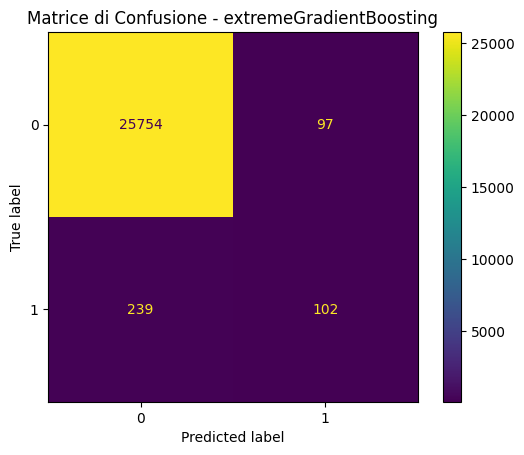

In [19]:
####################### CLASSIFICATION SENZA MAX FEATURES ###########################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Lista delle colonne preprocessate
colonne_preprocessate = [f"{colonna}_preprocessed" for colonna in colonne_da_preprocessare]

# Esegui la cross-validation per ogni classificatore
X = merged_dataset[colonne_preprocessate]
y = merged_dataset['positivi']

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
        ('tfidf', CustomTfidfTransformer() ),  # Usa il CustomTfidfTransformer
        ('smote', SMOTE(random_state=42)),
        ('classificazione', clf)
    ])

    # Trasforma i dati e ottieni la matrice TF-IDF combinata
    X_tfidf = pipeline.named_steps['tfidf'].fit_transform(X)
    #num_samples, num_features = X_tfidf.shape
    #print(f"Dimensione della matrice TF-IDF combinata: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Stampa il numero medio di features per colonna
    mean_features = pipeline.named_steps['tfidf'].mean_features_per_column()
    print("\nNumero medio di features per ciascuna colonna:")
    for col, mean_count in mean_features.items():
        print(f"Colonna '{col}': {mean_count:.2f} features")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()


In [20]:
#################### CUSTOM TRANSFORMER CON MAX FEATURES ########################

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

class CustomTfidfTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_features_per_column=None):
        """
        max_features_per_column è un dizionario che mappa i nomi delle colonne a un valore di max_features.
        Se non viene fornito, ogni colonna avrà un numero illimitato di features (comportamento di default).
        """
        self.max_features_per_column = max_features_per_column if max_features_per_column is not None else {}
        self.tfidf_column_vectorizers = {}
        self.column_feature_counts = {}  # Dizionario per accumulare le features di ogni colonna

    def fit(self, X, y=None):        
        for col in X.columns:
            # Recupera il numero massimo di features per questa colonna, se definito
            max_features = self.max_features_per_column.get(col, None)  # Imposta max_features se definito
            
            # Prendiamo i dati della colonna e applichiamo il TfidfVectorizer
            col_data = X[col].fillna('').astype(str)
            vectorizer = TfidfVectorizer(max_features=max_features)
            self.tfidf_column_vectorizers[col] = vectorizer
            self.tfidf_column_vectorizers[col].fit(col_data)

            # Salva il numero di features effettivo per questa colonna
            num_features_col = len(vectorizer.get_feature_names_out())
            if col in self.column_feature_counts:
                self.column_feature_counts[col].append(num_features_col)
            else:
                self.column_feature_counts[col] = [num_features_col]
        
        return self

    def transform(self, X):
        transformed_columns = []
        
        # Per ogni colonna, trasformiamo i dati usando il rispettivo TfidfVectorizer
        for col in X.columns:
            col_data = X[col].fillna('').astype(str)
            transformed_columns.append(self.tfidf_column_vectorizers[col].transform(col_data))
        
        # Combiniamo le trasformazioni di tutte le colonne
        X_combined = hstack(transformed_columns)  # Uniamo le matrici sparse in una sola

        return X_combined
    
    def mean_features_per_column(self):
        """
        Calcola e restituisce il numero medio di features per colonna.
        """
        mean_features = {col: sum(counts) / len(counts) for col, counts in self.column_feature_counts.items()}
        return mean_features



### Modello: extremeGradientBoosting ###
Numero di features per colonna:
 - testo_preprocessed: 5000 features
 - motivo_ricovero_preprocessed: 5000 features
 - anamnesi_preprocessed: 5000 features
 - esameobiettivo_preprocessed: 5000 features
 - terapiafarmaingresso_preprocessed: 5000 features
 - decorso_preprocessed: 5000 features
 - laboratorio_preprocessed: 5000 features
 - interventi_preprocessed: 5000 features
 - followup_preprocessed: 5000 features
 - terapie2_preprocessed: 2558 features
 - terapie3_preprocessed: 5000 features
 - esami_preprocessed: 1349 features
 - reparto_preprocessed: 121 features
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.990839  0.995706  0.993266       0.000755    0.001410      0.000696   
1   0.492969  0.301849  0.369363       0.089460    0.060433      0.056730   

   Support  Avg Features  
0   2585.1       53861.9  
1     34.1       53861.9  
AUC medio: 0.9346
Numero medio di feature

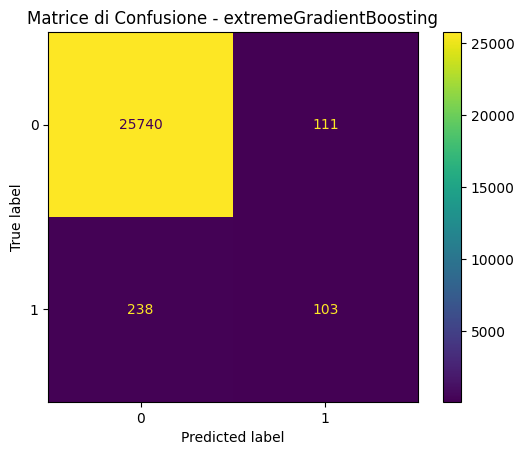

In [21]:
################### CLASSIFICATION CON MAX FEATURES ##############################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Lista delle colonne preprocessate
colonne_preprocessate = [f"{colonna}_preprocessed" for colonna in colonne_da_preprocessare]

# Definisci il dizionario max_features per ogni colonna
max_features_dict = {
    'testo_preprocessed': 5000,  
    'motivo_ricovero_preprocessed': 5000,   
    'anamnesi_preprocessed': 5000,
    'esameobiettivo_preprocessed': 5000,
    'terapiafarmaingresso_preprocessed': 5000,
    'decorso_preprocessed': 5000,
    'laboratorio_preprocessed': 5000,
    'interventi_preprocessed': 5000,
    'followup_preprocessed': 5000,
    'terapie2_preprocessed': 5000,
    'terapie3_preprocessed': 5000,
    'esami_preprocessed': 5000,
}

# Esegui la cross-validation per ogni classificatore
X = merged_dataset[colonne_preprocessate]
y = merged_dataset['positivi']

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline con il CustomTfidfTransformer
    pipeline = Pipeline([
        ('tfidf', CustomTfidfTransformer(max_features_per_column=max_features_dict)),
        ('smote', SMOTE(random_state=42)),
        ('classificazione', clf)  # Sostituisci con il tuo classificatore
    ])

    # Adattiamo il CustomTfidfTransformer per accedere alle features per ogni colonna
    pipeline.named_steps['tfidf'].fit(X)

    # Stampa il numero di features per ogni colonna
    print("Numero di features per colonna:")
    for col, vectorizer in pipeline.named_steps['tfidf'].tfidf_column_vectorizers.items():
        num_features_col = len(vectorizer.get_feature_names_out())
        print(f" - {col}: {num_features_col} features")

    # Trasforma i dati e ottieni la matrice TF-IDF combinata
    X_tfidf = pipeline.named_steps['tfidf'].transform(X)
    num_samples, num_features = X_tfidf.shape
    #print(f"Dimensione della matrice TF-IDF combinata: {num_samples} campioni, {num_features} features")

    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Stampa il numero medio di features per colonna
    mean_features = pipeline.named_steps['tfidf'].mean_features_per_column()
    print("\nNumero medio di features per ciascuna colonna:")
    for col, mean_count in mean_features.items():
        print(f"Colonna '{col}': {mean_count:.2f} features")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()


In [ ]:
###################################################################

In [25]:
# Esegui la cross-validation per ogni classificatore
for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline con il CustomTfidfTransformer
    pipeline = Pipeline([
        ('tfidf', CustomTfidfTransformer(max_features_per_column=max_features_dict)),
        ('smote', SMOTE(random_state=42)),
        ('classificazione', clf)
    ])

    # Adatta la pipeline
    pipeline.fit(X, y)

    # Ottieni i coefficienti dal classificatore
    if hasattr(clf, 'coef_'):  # Verifica se il classificatore ha il parametro 'coef_'
        coef = clf.coef_.flatten()  # Estrai i coefficienti come array
    else:
        print(f"Il classificatore {clf_name} non supporta i coefficienti.")
        continue

    # Ottieni i nomi delle feature da CustomTfidfTransformer
    feature_names = []
    for col, vectorizer in pipeline.named_steps['tfidf'].tfidf_column_vectorizers.items():
        column_feature_names = vectorizer.get_feature_names_out()
        feature_names.extend([f"{col}::{feature}" for feature in column_feature_names])

    # Associa i coefficienti alle feature
    feature_coef = list(zip(feature_names, coef))

    # Ordina le feature in base ai coefficienti (decrescente)
    top_features = sorted(feature_coef, key=lambda x: abs(x[1]), reverse=True)[:20]

    # Stampa le prime 20 features con la colonna di origine
    print("\nTop 20 features (con valori di coef più alti):")
    for feature, coef_value in top_features:
        col_name, feature_name = feature.split("::")
        print(f"Feature: {feature_name} (Colonna: {col_name}) - Coefficiente: {coef_value:.4f}")


### Modello: LogisticRegression ###

Top 20 features (con valori di coef più alti):
Feature: infezione (Colonna: testo_preprocessed) - Coefficiente: 5.9642
Feature: deiscenza (Colonna: motivo_ricovero_preprocessed) - Coefficiente: 3.5725
Feature: ferita (Colonna: testo_preprocessed) - Coefficiente: 3.4571
Feature: deiscenza (Colonna: testo_preprocessed) - Coefficiente: 3.3817
Feature: sottocostale (Colonna: testo_preprocessed) - Coefficiente: 3.2792
Feature: sovrapubica (Colonna: testo_preprocessed) - Coefficiente: 2.9193
Feature: laparotomia (Colonna: motivo_ricovero_preprocessed) - Coefficiente: 2.7848
Feature: ferito (Colonna: decorso_preprocessed) - Coefficiente: 2.7313
Feature: ferito (Colonna: testo_preprocessed) - Coefficiente: 2.5855
Feature: ferita (Colonna: anamnesi_preprocessed) - Coefficiente: 2.4462
Feature: esito (Colonna: testo_preprocessed) - Coefficiente: 2.3467
Feature: mezzo (Colonna: testo_preprocessed) - Coefficiente: 2.3187
Feature: data (Colonna: anamnesi_prepro


### Modello: LogisticRegression ###

Importanza cumulativa per ciascuna colonna (esclusa 'reparto'):
testo_preprocessed: 60.5607
motivo_ricovero_preprocessed: 13.0659
anamnesi_preprocessed: -33.0622
esameobiettivo_preprocessed: -22.5944
terapiafarmaingresso_preprocessed: -12.9481
decorso_preprocessed: -2.0042
laboratorio_preprocessed: -10.6786
interventi_preprocessed: -2.5895
followup_preprocessed: -41.0606
terapie2_preprocessed: -4.6154
terapie3_preprocessed: -22.9611
esami_preprocessed: 2.1125


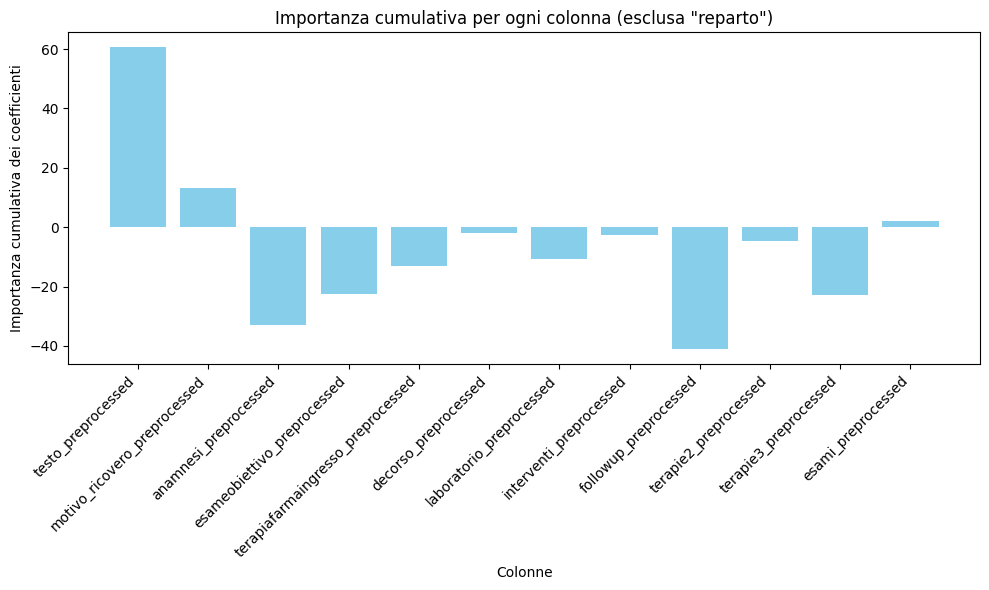

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Inizializza una lista per tenere traccia delle importanze delle colonne
column_importances = {}

# Calcola l'importanza cumulativa per ciascuna colonna (escludendo 'reparto')
for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline con il CustomTfidfTransformer
    pipeline = Pipeline([
        ('tfidf', CustomTfidfTransformer(max_features_per_column=max_features_dict)),
        ('smote', SMOTE(random_state=42)),
        ('classificazione', clf)
    ])

    # Adatta la pipeline
    pipeline.fit(X, y)

    # Ottieni i coefficienti dal classificatore
    if hasattr(clf, 'coef_'):  # Verifica se il classificatore ha il parametro 'coef_'
        coef = clf.coef_.flatten()  # Estrai i coefficienti come array
    else:
        print(f"Il classificatore {clf_name} non supporta i coefficienti.")
        continue

    # Ottieni i nomi delle feature da CustomTfidfTransformer
    feature_names = []
    for col, vectorizer in pipeline.named_steps['tfidf'].tfidf_column_vectorizers.items():
        column_feature_names = vectorizer.get_feature_names_out()
        feature_names.extend([f"{col}::{feature}" for feature in column_feature_names])

    # Associa i coefficienti alle feature
    feature_coef = list(zip(feature_names, coef))

    # Somma i coefficienti per ciascuna colonna (escludendo 'reparto')
    for col, vectorizer in pipeline.named_steps['tfidf'].tfidf_column_vectorizers.items():
        # Escludi la colonna 'reparto'
        if col == 'reparto_preprocessed':  # Assicurati che il nome della colonna sia corretto
            continue
        
        # Trova tutte le feature che appartengono alla colonna 'col'
        column_features = [f"{col}::{feature}" for feature in vectorizer.get_feature_names_out()]
        column_coef = [coef[i] for i, feature in enumerate(feature_names) if feature in column_features]
        
        # Somma i coefficienti per questa colonna
        column_importances[col] = np.sum(column_coef)

# Stampa l'importanza cumulativa di ciascuna colonna (escludendo 'reparto')
print("\nImportanza cumulativa per ciascuna colonna (esclusa 'reparto'):")
for col, importance in column_importances.items():
    print(f"{col}: {importance:.4f}")

# Crea il bar plot (escludendo 'reparto')
plt.figure(figsize=(10, 6))
plt.bar(column_importances.keys(), column_importances.values(), color='skyblue')
plt.xlabel('Colonne')
plt.ylabel('Importanza cumulativa dei coefficienti')
plt.title('Importanza cumulativa per ogni colonna (esclusa "reparto")')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Modello: extremeGradientBoosting ###
Dimensione della matrice TF-IDF combinata: 26192 campioni, 54028 features
Classification report mediato:
   Precision    Recall  F1-Score  Precision Std  Recall Std  F1-Score Std  \
0   0.991513  0.994197  0.992853       0.000782    0.001756      0.000923   
1   0.456846  0.354622  0.395296       0.093208    0.062100      0.060093   

   Support  Avg Features  
0   2585.1       53861.9  
1     34.1       53861.9  
AUC medio: 0.9367
Numero medio di features: 53861.90

Numero medio di features per ciascuna colonna:
Colonna 'testo_preprocessed': 5000.00 features
Colonna 'motivo_ricovero_preprocessed': 5000.00 features
Colonna 'anamnesi_preprocessed': 5000.00 features
Colonna 'esameobiettivo_preprocessed': 5000.00 features
Colonna 'terapiafarmaingresso_preprocessed': 5000.00 features
Colonna 'decorso_preprocessed': 5000.00 features
Colonna 'laboratorio_preprocessed': 5000.00 features
Colonna 'interventi_preprocessed': 5000.00 features
Colonna 'foll

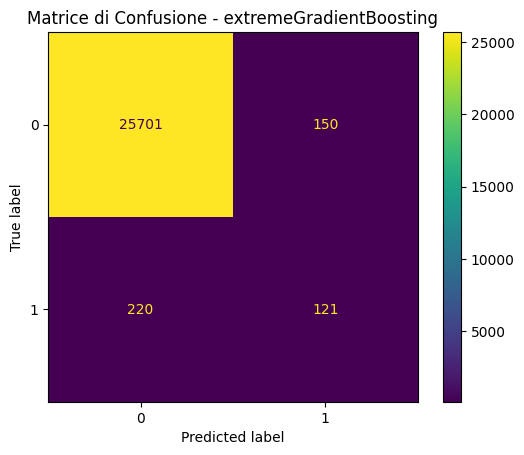

In [22]:
############################## SMOTE + UNDERSAMPLING CON MAX FEATURES ##########################

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Lista delle colonne preprocessate
colonne_preprocessate = [f"{colonna}_preprocessed" for colonna in colonne_da_preprocessare]

# Definisci il dizionario max_features per ogni colonna
max_features_dict = {
    'testo_preprocessed': 5000,  
    'motivo_ricovero_preprocessed': 5000,   
    'anamnesi_preprocessed': 5000,
    'esameobiettivo_preprocessed': 5000,
    'terapiafarmaingresso_preprocessed': 5000,
    'decorso_preprocessed': 5000,
    'laboratorio_preprocessed': 5000,
    'interventi_preprocessed': 5000,
    'followup_preprocessed': 5000,
    'terapie2_preprocessed': 5000,
    'terapie3_preprocessed': 5000,
    'esami_preprocessed': 5000,
}

# Esegui la cross-validation per ogni classificatore
X = merged_dataset[colonne_preprocessate]
y = merged_dataset['positivi']

for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")
    
    # Crea la pipeline con il CustomTfidfTransformer
    pipeline = Pipeline([
    ('tfidf', CustomTfidfTransformer(max_features_per_column=max_features_dict)),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.6)),  # Applica SMOTE fino al 60% della classe maggioritaria
    ('undersample', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),
    ('classificazione', clf)  # Sostituisci con il tuo classificatore
])

    # Trasforma i dati e ottieni la matrice TF-IDF combinata
    X_tfidf = pipeline.named_steps['tfidf'].fit_transform(X)
    num_samples, num_features = X_tfidf.shape
    print(f"Dimensione della matrice TF-IDF combinata: {num_samples} campioni, {num_features} features")
 
    # Calcola le metriche usando la funzione
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Stampa il numero medio di features per colonna
    mean_features = pipeline.named_steps['tfidf'].mean_features_per_column()
    print("\nNumero medio di features per ciascuna colonna:")
    for col, mean_count in mean_features.items():
        print(f"Colonna '{col}': {mean_count:.2f} features")
    
    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()


In [ ]:
######################################################

In [ ]:
#################################### grid search per i parametri di mpl ####################

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Definisci i parametri da cercare
param_grid = {
    'classificazione__hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'classificazione__activation': ['relu', 'tanh'],
    'classificazione__learning_rate_init': [0.001, 0.01],
    'classificazione__alpha': [0.0001, 0.001],
    'classificazione__max_iter': [1000, 2000]
}

# Crea la pipeline con il CustomTfidfTransformer
pipeline = Pipeline([
    ('tfidf', CustomTfidfTransformer(max_features_per_column=max_features_dict)),
    ('smote', SMOTE(random_state=42)),
    ('classificazione', MLPClassifier(solver='adam', random_state=42))  # Inizializza MLPClassifier
])

# Esegui GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation

# Esegui la ricerca dei parametri
grid_search.fit(X, y)  # Usa X (dati) e y (etichette) da merged_dataset

# Stampa i migliori parametri
print(f"I migliori parametri: {grid_search.best_params_}")

I migliori parametri: {'classificazione__activation': 'relu', 'classificazione__alpha': 0.0001, 'classificazione__hidden_layer_sizes': (100, 100), 'classificazione__learning_rate_init': 0.001, 'classificazione__max_iter': 1000}
